# Specific operations for a list of Integer

In [ ]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
from IPython.display import Image, display

In [4]:
class AgentState(TypedDict):
    values : List[int]
    name : str
    operation : str
    message : str

def operation(state : AgentState) -> AgentState:
    """The function which perform the given operation on to the list of integers and return
    a message."""
    if state['operation'] == '+':
        state["message"] = f"Hey {state['name']}, your age is {sum(state['values'])}."
    elif state['operation'] == '*':
        ans = 1
        for val in state['values']:
            ans *= val
        state['message'] = f"Hey {state['name']}, your weight is {ans}."
    else:
        state['message'] = f"Hey {state['name']}, this agent supports either '+' or '*' operation."
    return state


In [5]:
graph = StateGraph(AgentState)

graph.add_node("specific_operator", operation)
graph.set_entry_point("specific_operator")
graph.set_finish_point("specific_operator")

app = graph.compile()

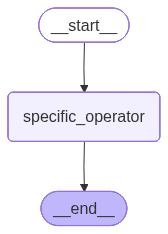

In [7]:
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
result = app.invoke({"name": "Gaurav", "values" : [25,3], 'operation': '+'})
result['message']

'Hey Gaurav, your age is 28.'

In [12]:
result = app.invoke({"name": "Gaurav", "values" : [25,3], 'operation': '*'})
result['message']

'Hey Gaurav, your weight is 75.'